### GUIDE 2. BIVARIATE DESCRIPTIVE STATISTICS

#### Developed by. Luis Villarroel. Master in statistics
#### Email. l_villarro@ucb.edu.bo  l_villarro@yahoo.es
#### Phone. +1 (206) 307 7131
##### Seattle Washington, USA

In [1]:
import pandas as pd
import numpy as nu 
import scipy as sc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
datos=pd.read_spss("D:/GESTIONES/GESTION 2021/CURSOS/UCB/1. UCB SCZ POSTGRADO/UCB POSTGRADO/BD/BDATOS.SAV")

In [29]:
datos.dtypes

ID           float64
sexo        category
edad         float64
compra      category
ingresos     float64
gasto        float64
vivienda     float64
ngasto      category
dtype: object

In [3]:
datos.describe()

,ID,edad,ingresos,gasto,vivienda
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,51.238095,501.357143,481.904762,0.547619
std,12.267844,8.248605,121.812896,124.278171,0.503761
min,1.000000,36.000000,320.000000,270.000000,0.000000
25%,11.250000,45.000000,385.750000,400.000000,0.000000
50%,21.500000,53.000000,497.500000,470.000000,1.000000
75%,31.750000,57.000000,571.500000,545.000000,1.000000
max,42.000000,68.000000,750.000000,800.000000,1.000000


In [30]:
datos.head()

,ID,sexo,edad,compra,ingresos,gasto,vivienda,ngasto
0,1.0,Mujer,43.0,si,502.0,550.0,1.0,Alto
1,2.0,Mujer,61.0,si,703.0,400.0,1.0,Bajo
2,3.0,Mujer,36.0,si,485.0,400.0,0.0,Bajo
3,4.0,Mujer,55.0,si,572.0,560.0,1.0,Alto
4,5.0,Mujer,51.0,si,570.0,470.0,1.0,Normal


In [31]:
datos.columns

Index(['ID', 'sexo', 'edad', 'compra', 'ingresos', 'gasto', 'vivienda',
       'ngasto'],
      dtype='object')

### 1. DISTRIBUCIONES DE FRECUENCIA BIDIMENSIONALES

#### H01. DISTRIBUCION DE FRECUENCIA BIDIMENSIONAL

In [32]:
pd.crosstab(index=datos['vivienda'],
            columns=datos['sexo'], margins=True)

sexo,Hombre,Mujer,All
vivienda,,,
0.0,9,10,19
1.0,12,11,23
All,21,21,42


In [33]:
pd.crosstab(index=datos['vivienda'], columns=datos['sexo'],
            margins=True).apply(lambda r: r/len(datos) *100,
                                axis=1)

sexo,Hombre,Mujer,All
vivienda,,,
0.0,21.428571,23.809524,45.238095
1.0,28.571429,26.190476,54.761905
All,50.000000,50.000000,100.000000


In [34]:
pd.crosstab(index=datos['vivienda'], columns=datos['sexo'],
            margins=True).apply(lambda r: r/r.sum() *100,
                                axis=1)

sexo,Hombre,Mujer,All
vivienda,,,
0.0,23.684211,26.315789,50.0
1.0,26.086957,23.913043,50.0
All,25.000000,25.000000,50.0


In [35]:
pd.crosstab(index=datos['vivienda'], columns=datos['sexo'],
            margins=True).apply(lambda r: r/r.sum() *100,
                                axis=0)

sexo,Hombre,Mujer,All
vivienda,,,
0.0,21.428571,23.809524,22.619048
1.0,28.571429,26.190476,27.380952
All,50.000000,50.000000,50.000000


### 2. GRAFICAS BIDIMENSIONALES

#### H02. DIAGRAMA DE DISPERSION

<function matplotlib.pyplot.show(close=None, block=None)>

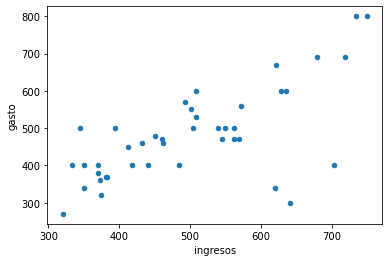

In [36]:
datos.plot.scatter(x="ingresos", y="gasto")
plt.show

### 3. ESTADIGRAFOS BIDIMENSIONALES

#### H03. COVARIANZA

In [37]:
x=datos.ingresos
y=datos.gasto
r=nu.cov(x,y)
print (r)

[[14838.3815331  10338.08362369]
 [10338.08362369 15445.06387921]]


#### H04. COEFICIENTE DE CORRELACION

In [38]:
x=datos.ingresos
y=datos.gasto
r=nu.corrcoef(x,y)
print (r)

[[1.         0.68289183]
 [0.68289183 1.        ]]


In [39]:
rr=datos[["edad", "ingresos","gasto"]].corr()
print (rr)

              edad  ingresos     gasto
edad      1.000000  0.347008  0.167046
ingresos  0.347008  1.000000  0.682892
gasto     0.167046  0.682892  1.000000


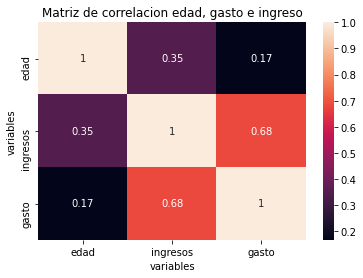

In [40]:
sns.heatmap(rr,annot=True)
plt.title("Matriz de correlacion edad, gasto e ingreso")
plt.xlabel ("variables")
plt.ylabel ("variables")
plt.savefig("grafico.png")

#### H05. REGRESION LINEAL SIMPLE

In [3]:
x=datos["ingresos"]
y=datos["gasto"]
x=sm.add_constant(x) # Adiciona la constante al modelo
model=sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gasto   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     34.95
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           6.28e-07
Time:                        15:59:26   Log-Likelihood:                -248.45
No. Observations:                  42   AIC:                             500.9
Df Residuals:                      40   BIC:                             504.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.6031     60.760      2.182      0.035       9.803     255.403
ingresos       0.6967      0.118      5.912      0.000       0.459       0.935
==============================================================================
Omnibus:                       12.390   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.243
Skew:                          -1.044   Prob(JB):                      0.00133
Kurtosis:                       4.791   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""